# **Hear Disease Prediction Using Machine Learning and Deep Learning Methods**

# **Data Analysis**

# Importing Required Libraries and Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing Starts Here

# Importing the Dataset

In [ ]:
dataset=pd.read_csv("/content/heart_data.csv")

In [ ]:
dataset.shape

(303, 14)

In [ ]:
dataset.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [ ]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Visualising Information of Dataset to Get Better Understandings

In [ ]:
information=["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic",
             "resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl",
             "resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved",
             "exercise induced angina","oldpeak = ST depression induced by exercise relative to rest",
             "the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy",
             "thal: 3 = normal; 6 = fixed defect; 7 = reversable defect", "0: Healthy, 1: Problem with Heart"]

In [ ]:
table=pd.DataFrame(information,index=dataset.columns[:])
table

,0
age,age
sex,"1: male, 0: female"
cp,"chest pain type, 1: typical angina, 2: atypica..."
trestbps,resting blood pressure
chol,serum cholestoral in mg/dl
fbs,fasting blood sugar > 120 mg/dl
restecg,resting electrocardiographic results (values 0...
thalach,maximum heart rate achieved
exang,exercise induced angina
oldpeak,oldpeak = ST depression induced by exercise re...


In [ ]:
table.to_excel("Dataset Information.xlsx")

In [ ]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


In [ ]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Performing Exploratory Data Analysis(EDA)

Understanding target column

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


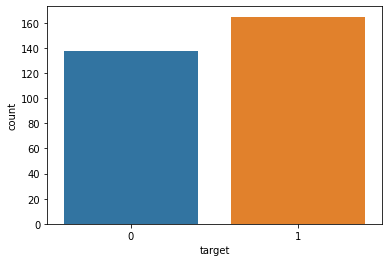

In [ ]:
plt.figure()
y=dataset["target"]
sns.countplot(y)
plt.savefig("Target Countplot")

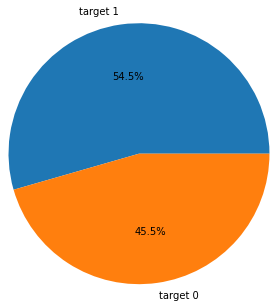

<Figure size 432x288 with 0 Axes>

In [ ]:
target_values=dataset.target.value_counts()
plt.figure()
plt.pie(target_values.values, labels = ["target 1", "target 0"], autopct='%1.1f%%', radius = 1.5) 
plt.show()
plt.savefig("Target Pie")

In [ ]:
print(target_values)
print("How many positive and negative values in dataset: \n")
print("Entries percentage not having heart disease: "+str(round(target_values[0]*100/303))+"%")
print("Entries percentage not having heart disease: "+str(round(target_values[1]*100/303))+"%")

1    165
0    138
Name: target, dtype: int64
How many positive and negative values in dataset: 

Entries percentage not having heart disease: 46%
Entries percentage not having heart disease: 54%


# Visualising Columns

1: male, 0: female

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


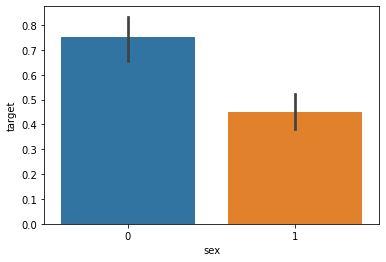

In [ ]:
plt.figure()
sns.barplot(dataset["sex"],y)
plt.savefig("sex corr")

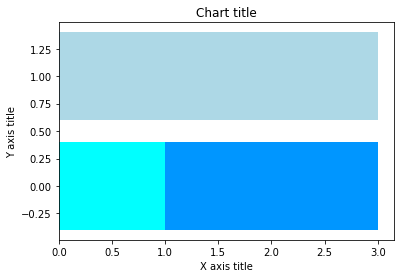

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure()
sns.barplot(dataset["cp"],y)
plt.savefig("cp corr")

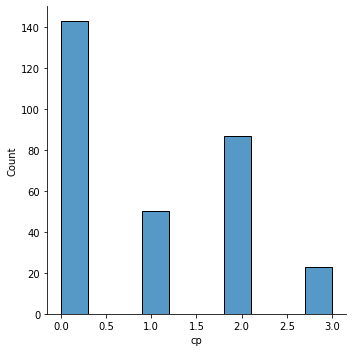

In [ ]:
sns.displot(dataset["cp"])
plt.savefig("cp-count-plot")

In [ ]:
import plotly.express as px
plt.figure(figsize=(10,10))
fig = px.histogram(dataset, x="cp", color='target', barmode='group', height=400)
fig.update_layout(title="Effect of chest pain on heart disease", xaxis_title="chest pain",\
                  yaxis_title="no. of cases",legend_title="target", font=dict(size=12))
plt.savefig("CP")
fig.show()

<Figure size 720x720 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


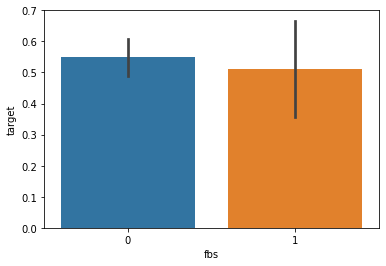

In [ ]:
sns.barplot(dataset["fbs"],y)
plt.savefig("fbs corr")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


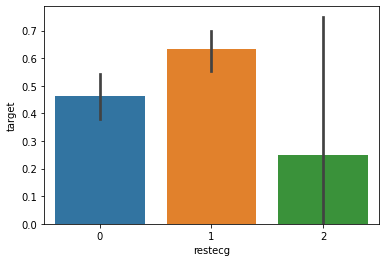

In [ ]:
sns.barplot(dataset["restecg"],y)
plt.savefig("restecg corr")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


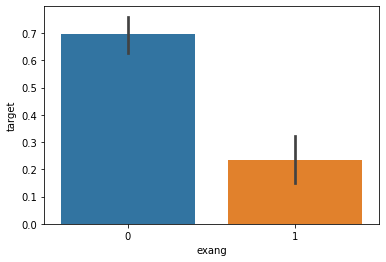

In [ ]:
sns.barplot(dataset["exang"],y)
plt.savefig("exang corr")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


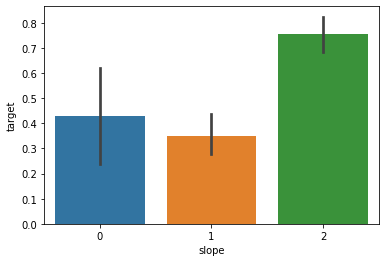

In [ ]:
sns.barplot(dataset["slope"],y)
plt.savefig("slope corr")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


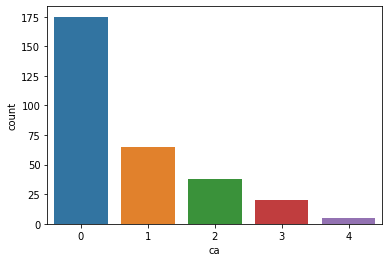

In [ ]:
sns.countplot(dataset["ca"])
plt.savefig("ca count")

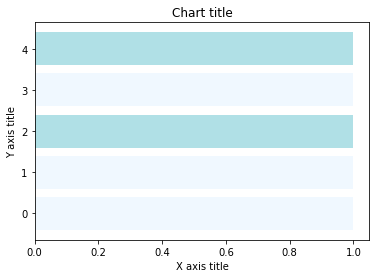

In [ ]:
sns.barplot(dataset["ca"],y)
plt.savefig("ca corr")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


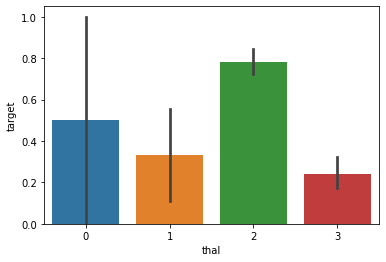

In [ ]:
sns.barplot(dataset["thal"],y)
plt.savefig("thal corr")

# Findind if there are any outliers

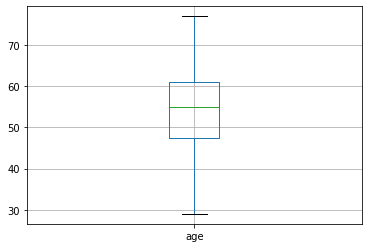

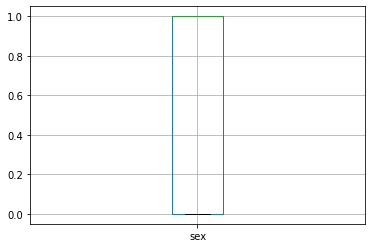

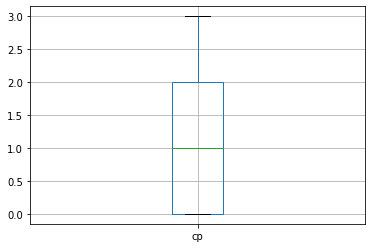

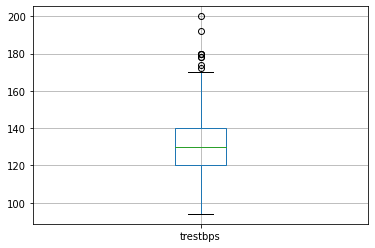

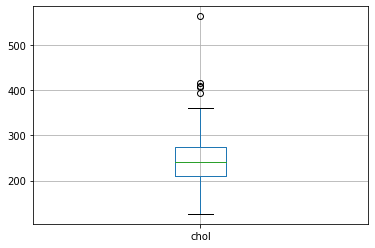

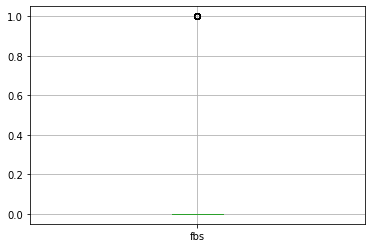

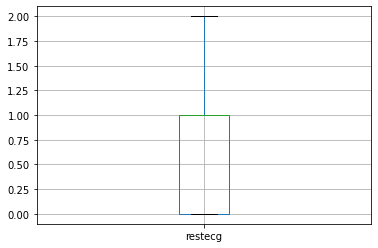

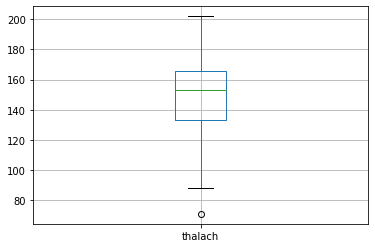

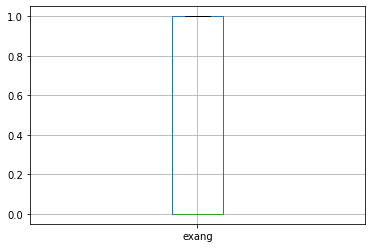

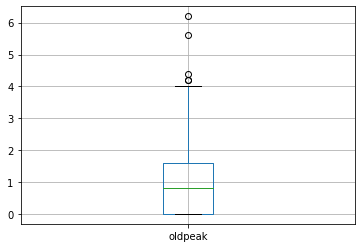

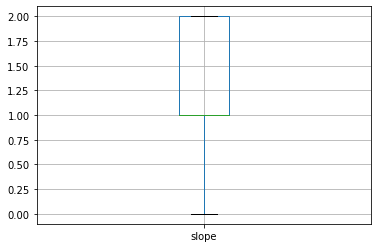

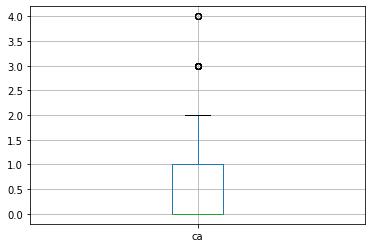

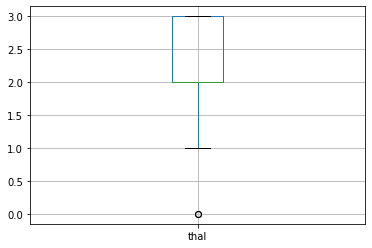

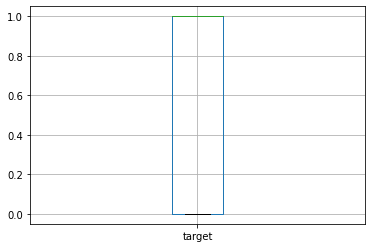

In [ ]:
for column in dataset:
  plt.figure()
  dataset.boxplot([column])
  plt.savefig(str(column) + "outliers")

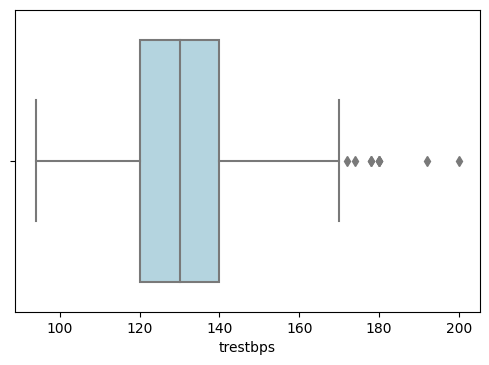

In [ ]:
plt.figure(dpi = 100)
sns.boxplot(x = dataset['trestbps'], color = 'lightblue')
plt.savefig("trest bps new outliers")
plt.show()

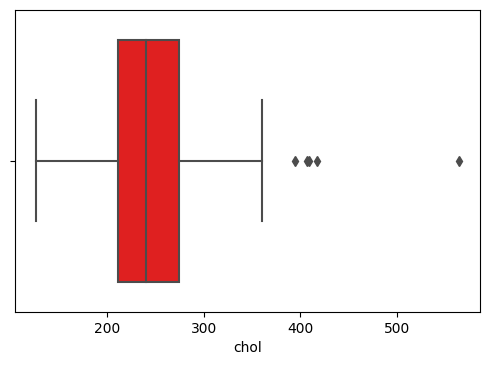

In [ ]:
plt.figure(dpi = 100)
sns.boxplot(x = dataset['chol'], color = 'red')
plt.savefig("chol new outliers")
plt.show()

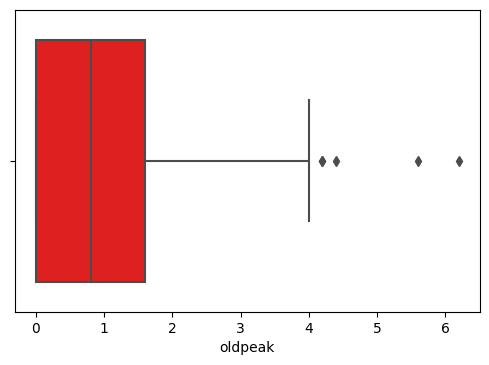

In [ ]:
plt.figure(dpi = 100)
sns.boxplot(x = dataset['oldpeak'], color = 'red')
plt.savefig("oldpeak new outliers")
plt.show()

# Heat Map

In [ ]:
corelation=dataset.corr()

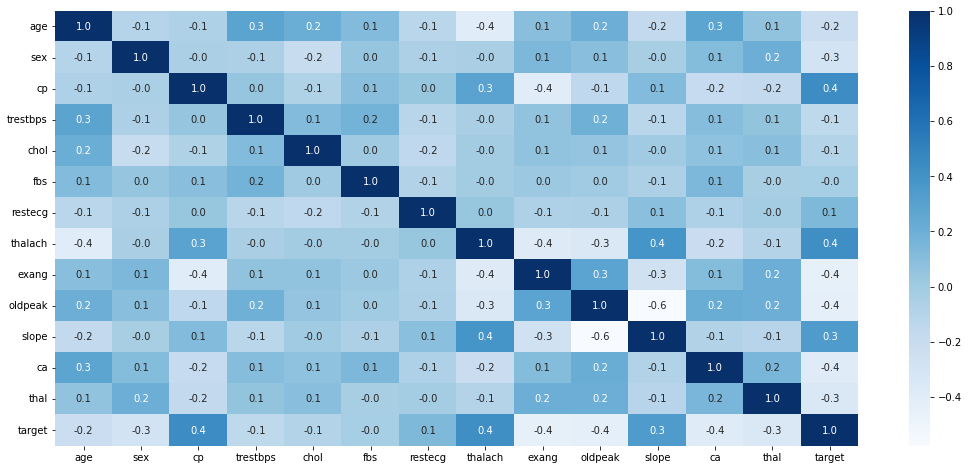

In [ ]:
plt.figure(figsize=(18,8))
sns.heatmap(corelation, cbar=True, fmt='.1f', annot=True, cmap='Blues')
plt.savefig("Heatmap Co-relation")

# Ending-Up Data Analysis

# Conclusion of Data Analysis

1. We drawn conclusion that exang, oldpeak, thalach, cp are the features very important and dominent on target value.

2. Then in these features we understood what values are more dominent from barplot.
  * Females are more likely to have heart disease (Barplot-1).
  * Chest pain type 1, 2, 3 are more open to heart disease.
  * 0 and 1 restecg is more dominent.
  * 0 exang is more dominent.
  * ecg slope value 2 is more open to heart disease.
  * 0 and 4 number of major vessels colored by flourosopy are dominent where 4 vessels are very rare and very dominent.
3. Entries percentage not having heart disease: 46%
4. Entries percentage not having heart disease: 54%
5. Data does not contain any missing values.
6. Data contains outliers but they are the actual values so we cant change them.
7. From heatmap we understood the corelation between different columns. We conclude from heatmap that there is no such column having direct 100% proportionality with each other. So, all columns frm dataset are important to predict the result. This takes us to our next conclusion.
8. After analyzing the data we understood that all features are important for predicting the Dependent Variable. Hence we will select all feature to build the model